<a href="https://colab.research.google.com/github/ajou-y0uC4N/y0uC4N/blob/main/UAVCAN_type6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import time
#visualization
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import graphviz
import seaborn as sns
from pandas.plotting import scatter_matrix

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MultiLabelBinarizer

# Oversampling
from imblearn.over_sampling import SMOTE

# PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

# Models
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm import LinearSVC, SVC, OneClassSVM
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import reciprocal, uniform

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance
from xgboost import XGBRegressor

# Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics.pairwise import rbf_kernel

# Keras
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow.keras.layers import Input, Dense, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Nadam

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/univ_pri/UAVCAN/type6.csv')

Mounted at /content/gdrive


In [ ]:
y = data['type']
X = data.drop(columns =['type'])
X = X.drop(columns =['isCan0'])
X = X.drop(columns = ['time'])
X = X.drop(columns=['priority'])
X = X.drop(columns=['serviceNODEID'])
X = X.drop(columns=['isService'])
X = X.drop(columns=['messageID'])
X = X.drop(columns=['8byteNullCnt'])
X = X.drop(columns=['7byteNullCnt'])
X = X.drop(columns=['byteSize'])
data.isnull().sum()
y.unique()
X.head()

,data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7]
0,166,53,0,0,0,0,0,156
1,0,0,0,0,0,0,124,-1
2,166,53,0,0,0,0,0,157
3,0,0,0,0,0,0,125,-1
4,166,53,0,0,0,0,0,158


In [ ]:
y.head()

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: type, dtype: object

In [ ]:
y = y.map({'Normal': 0, 'Attack': 1})

In [ ]:
y.unique()

array([0, 1])

In [ ]:
print(X.size)
print(y.size)

1930568
241321


Text(0, 0.5, 'Number of Records')

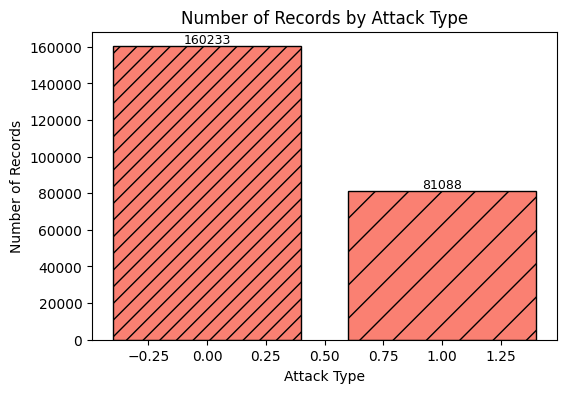

In [ ]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 10

exam_x = y.value_counts().index.to_list()
exam_y = y.value_counts().to_list()

plt.bar(exam_x, exam_y)

bars = plt.bar(exam_x, exam_y, color='salmon', edgecolor='black')
bars[0].set_hatch('//')
bars[1].set_hatch('/')

for i, v in enumerate(exam_x):
    plt.text(v, exam_y[i], exam_y[i],
             fontsize=9,
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.title("Number of Records by Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Number of Records")

# **RF**

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#RF
params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1) # gridserach 최적 파라미터
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 10}
최고 예측 정확도: 0.9658


In [ ]:
rf = RandomForestClassifier(n_estimators=100, min_samples_split=20, min_samples_leaf=8, max_depth=8, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, min_samples_split=20,
                       n_jobs=-1)

In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
241316    0
241317    0
241318    0
241319    0
241320    0
Name: type, Length: 241321, dtype: int64

In [ ]:
y_pred1 = rf.predict(X_test)

In [ ]:
report = classification_report(y_test, y_pred1, target_names=['Attack', 'Normal'], digits=4)
print(report)

              precision    recall  f1-score   support

      Attack     0.9415    0.9974    0.9687     31777
      Normal     0.9944    0.8806    0.9341     16488

    accuracy                         0.9575     48265
   macro avg     0.9680    0.9390    0.9514     48265
weighted avg     0.9596    0.9575    0.9568     48265



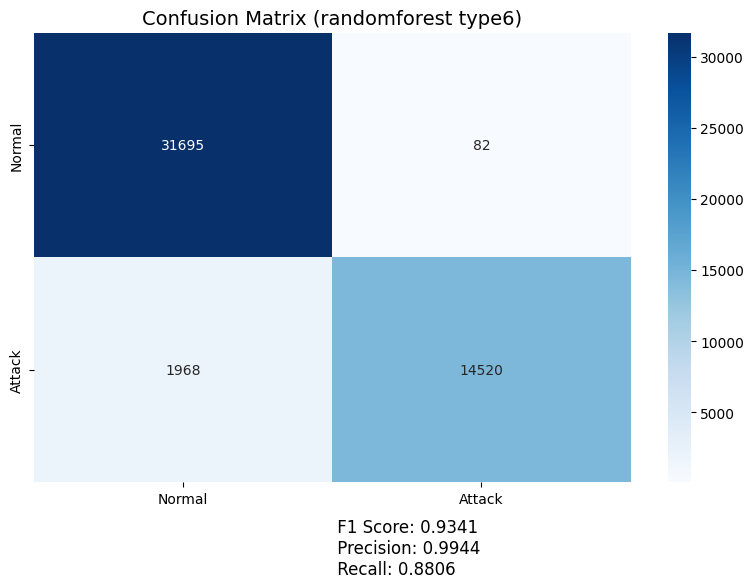

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# case1 model
cm1 = confusion_matrix(y_test, y_pred1, labels=[0, 1])
f1_1 = f1_score(y_test, y_pred1, pos_label=1)
precision_1 = precision_score(y_test, y_pred1, pos_label=1)
recall_1 = recall_score(y_test, y_pred1, pos_label=1)

# 그래프 그리기
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# 첫 번째 subplot: baseline model
ax.set_title('Confusion Matrix (randomforest type6)', fontsize=14)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)

# Confusion Matrix에 F1 Score, Precision, Recall 값 추가
ax.text(0.5, -0.1, f'\n\n F1 Score: {f1_1:.4f}    \n Precision: {precision_1:.4f} \n Recall: {recall_1:.4f}',
        horizontalalignment='left', verticalalignment='center', transform=ax.transAxes,
        fontsize=12)

# Heatmap 그리기
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=ax, xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])

# subplot 간 간격 조절
plt.tight_layout()
plt.show()


Feature ranking:
1. feature data5 (0.262)
2. feature data3 (0.226)
3. feature data1 (0.167)
4. feature data0 (0.124)
5. feature data4 (0.065)
6. feature data2 (0.055)
7. feature data7 (0.054)
8. feature data6 (0.047)


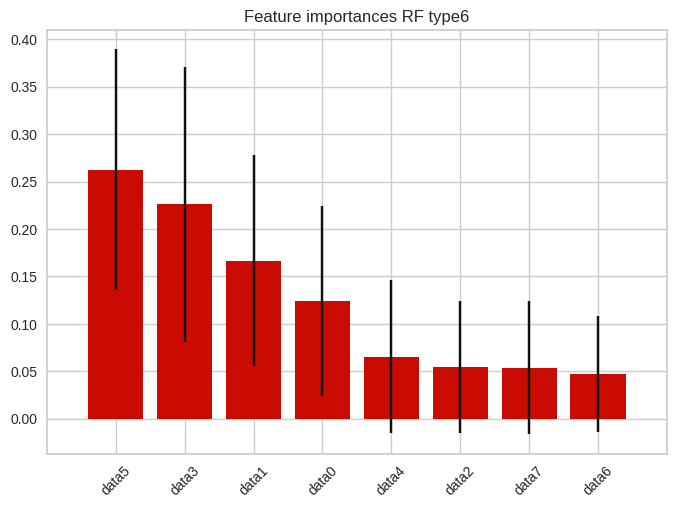

In [46]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances RF type6")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
!pip install lightgbm==3.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.8 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [ ]:
import lightgbm

print(lightgbm.__version__)

3.3.2


In [ ]:
import re
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.dtypes

data0    int64
data1    int64
data2    int64
data3    int64
data4    int64
data5    int64
data6    int64
data7    int64
dtype: object

In [ ]:
#_train['data[0]'] = pd.to_numeric(X_train['data[0]'])
X_train = X_train.astype(float)
X_train.dtypes

data0    float64
data1    float64
data2    float64
data3    float64
data4    float64
data5    float64
data6    float64
data7    float64
dtype: object

# **DT**

In [ ]:
##### Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DecisionTreeClassifier 객체 생성
dt_classifier = DecisionTreeClassifier()

# 그리드 탐색을 위한 매개변수 그리드 정의
dt_param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# StratifiedKFold를 사용하여 교차 검증 수행
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV 객체 생성 및 교차 검증 수행
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=dt_param_grid, cv=skf, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 가장 성능이 좋은 모델 추출
best_dt_model = grid_search.best_estimator_

# 가장 성능이 좋은 매개변수 및 점수 출력
best_parameters = grid_search.best_params_
best_score = best_dt_model.score(X_test, y_test)

print(f"Best parameters: {best_parameters}")
print(f"Best score: {best_score}")
##Best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
##Best score: 0.9967056873510826


Best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9967885631409924


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
y_pred1= dt.fit(X_train, y_train)

In [ ]:
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.9997979860765788
0.998093856832073


In [ ]:
y_pred1 = dt.predict(X_test)

In [ ]:
report = classification_report(y_test, y_pred1, target_names=['Attack', 'Normal'], digits=4)
print(report)

              precision    recall  f1-score   support

      Attack     0.9997    0.9974    0.9986     31846
      Normal     0.9949    0.9995    0.9972     16419

    accuracy                         0.9981     48265
   macro avg     0.9973    0.9984    0.9979     48265
weighted avg     0.9981    0.9981    0.9981     48265



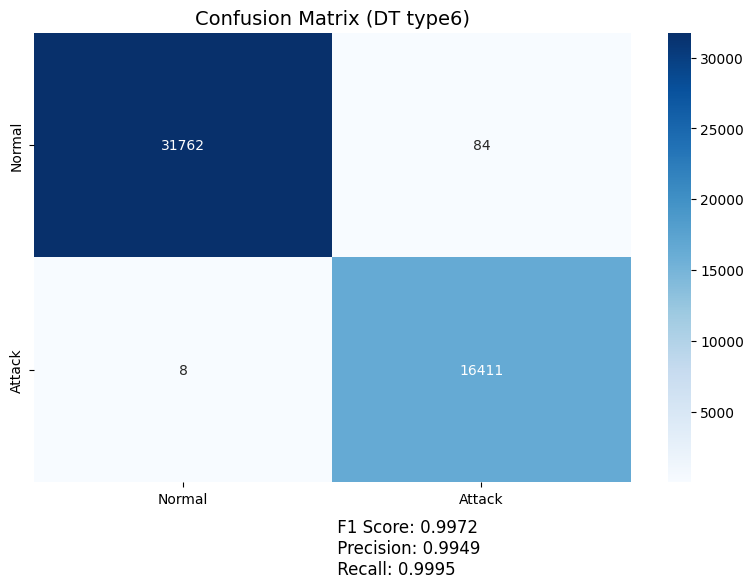

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# case1 model
cm1 = confusion_matrix(y_test, y_pred1, labels=[0, 1])
f1_1 = f1_score(y_test, y_pred1, pos_label=1)
precision_1 = precision_score(y_test, y_pred1, pos_label=1)
recall_1 = recall_score(y_test, y_pred1, pos_label=1)

# 그래프 그리기
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# 첫 번째 subplot: baseline model
ax.set_title('Confusion Matrix (DT type6)', fontsize=14)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)

# Confusion Matrix에 F1 Score, Precision, Recall 값 추가
ax.text(0.5, -0.1, f'\n\n F1 Score: {f1_1:.4f}    \n Precision: {precision_1:.4f} \n Recall: {recall_1:.4f}',
        horizontalalignment='left', verticalalignment='center', transform=ax.transAxes,
        fontsize=12)

# Heatmap 그리기
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=ax, xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])

# subplot 간 간격 조절
plt.tight_layout()
plt.show()


# lightGBM

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer
train_ds = lgb.Dataset(X_train, label = y_train)
test_ds = lgb.Dataset(X_test, label = y_test)
params = {'learning_rate': 0.01,
          'max_depth': 16,
          'boosting': 'gbdt',
          'objective': 'binary',
          'metric': 'binary_logloss',
          'is_training_metric': True,
          'num_leaves': 144,
          'feature_fraction': 0.9,
          'bagging_fraction': 0.7,
          'bagging_freq': 5,
          'seed':2020}

# eval_set
evals = [ (X_test, y_test) ]
from lightgbm import LGBMClassifier
# 학습 (조기 중단 지정)
lgbm_wrapper = LGBMClassifier(n_estimators=4000)
# Use the `early_stopping_rounds` parameter within `fit()`
#lgbm_wrapper.fit(X_train, y_train, eval_set = evals, eval_metric = "logloss", verbose=True, early_stopping_rounds=100)


lgbm_wrapper.fit(X_train, y_train, eval_set = evals, callbacks = [lgb.early_stopping(stopping_rounds = 50), lgb.log_evaluation(period = 100)],
        eval_metric = 'auc')
# 조기 중단 파라미터
#model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)
#y

Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.999869	valid_0's binary_logloss: 0.0130931
[200]	valid_0's auc: 0.999909	valid_0's binary_logloss: 0.00960982
[300]	valid_0's auc: 0.999923	valid_0's binary_logloss: 0.00814765
[400]	valid_0's auc: 0.999929	valid_0's binary_logloss: 0.00737891
Early stopping, best iteration is:
[432]	valid_0's auc: 0.999931	valid_0's binary_logloss: 0.00720662


LGBMClassifier(n_estimators=4000)

In [ ]:
y_test

229931    0
190921    1
94676     1
187371    1
184313    0
         ..
224248    1
110071    0
107755    0
222219    1
20869     0
Name: type, Length: 48265, dtype: int64

In [ ]:
y_pred1 = lgbm_wrapper.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print(f'accuracy: {accuracy:.3f}')

accuracy: 0.998


In [ ]:
report = classification_report(y_test, y_pred1, target_names=['Attack', 'Normal'], digits=4)
print(report)

              precision    recall  f1-score   support

      Attack     0.9998    0.9975    0.9986     31846
      Normal     0.9952    0.9996    0.9974     16419

    accuracy                         0.9982     48265
   macro avg     0.9975    0.9985    0.9980     48265
weighted avg     0.9982    0.9982    0.9982     48265



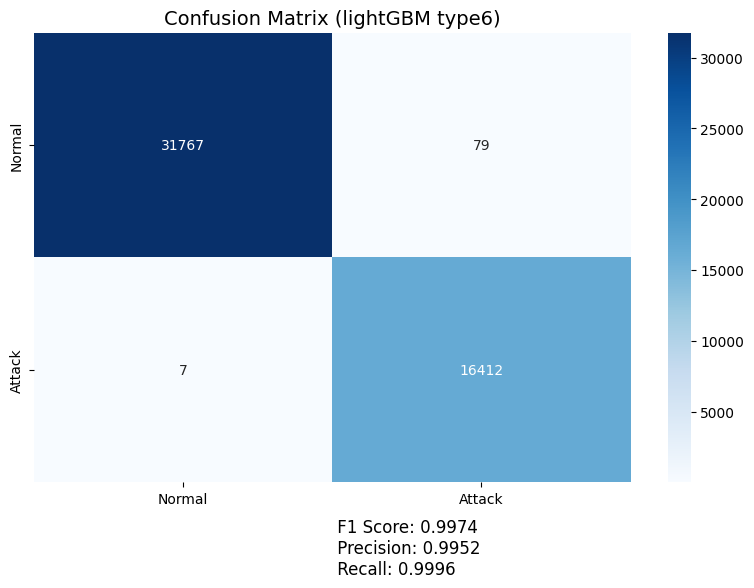

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# case1 model
cm1 = confusion_matrix(y_test, y_pred1, labels=[0, 1])
f1_1 = f1_score(y_test, y_pred1, pos_label=1)
precision_1 = precision_score(y_test, y_pred1, pos_label=1)
recall_1 = recall_score(y_test, y_pred1, pos_label=1)

# 그래프 그리기
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# 첫 번째 subplot: baseline model
ax.set_title('Confusion Matrix (lightGBM type6)', fontsize=14)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)

# Confusion Matrix에 F1 Score, Precision, Recall 값 추가
ax.text(0.5, -0.1, f'\n\n F1 Score: {f1_1:.4f}    \n Precision: {precision_1:.4f} \n Recall: {recall_1:.4f}',
        horizontalalignment='left', verticalalignment='center', transform=ax.transAxes,
        fontsize=12)

# Heatmap 그리기
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=ax, xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])

# subplot 간 간격 조절
plt.tight_layout()
plt.show()


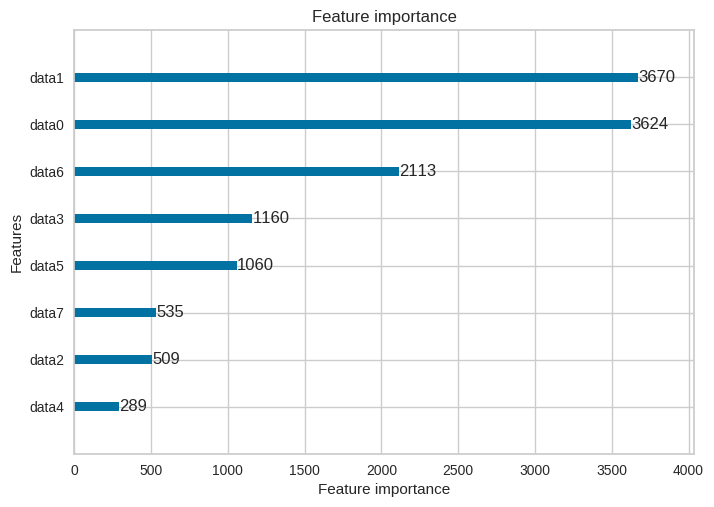

In [44]:
from lightgbm import plot_importance

plot_importance(lgbm_wrapper)
plt.show()

# **K-means**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

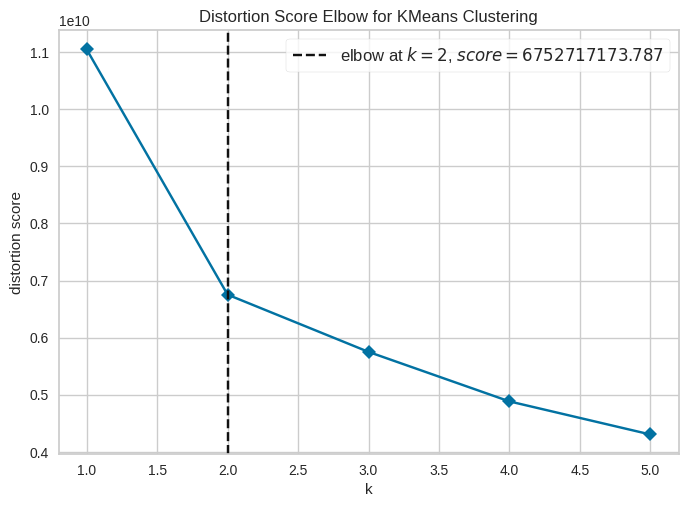

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
# Elbow method
#군집 내 오차제곱합(SSE, sum of squared error)의 합을 군집화의 비용함수로 정의.군집 수가 늘어날수록 비용함수는 감소함.
#이때, 비용함수 감소 기울기가 급격히 줄어드는 부분(더이상 군집을 늘려도 크게 비용이 감소하지 않는 부분)을 최적의 군집수로 판단한다.
k=0
kmeans = KMeans(n_clusters=k, random_state=7)
visualizer = KElbowVisualizer(kmeans, k=(1,6), timings=False)
visualizer.fit(X)
visualizer.show()

In [ ]:
X.shape

(241321, 8)

In [ ]:
import re
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=2, n_init=1, max_iter=100)
Kmeans.fit(X_train)

KMeans(max_iter=100, n_clusters=2, n_init=1)

In [ ]:
Kmeans.cluster_centers_

array([[125.11846727, 127.83135977, 132.12978978,  72.44168441,
        127.47175359, 172.52887174,  52.00235498, 134.80170303],
       [ 81.04576915, 125.38064905,  10.98630997,  45.80995114,
          3.72418063,   2.08329375,  98.46041426,  30.42327136]])

In [ ]:
Kmeans.labels_ # 학습에 활용된 데이터의 cluster를 예측

array([1, 1, 0, ..., 1, 0, 1], dtype=int32)

In [ ]:
Kmeans.predict(X_train) # 임의의 point가 어느 cluster에 포함되는지 예측

array([1, 1, 0, ..., 1, 0, 1], dtype=int32)

In [ ]:
Kmeans.transform(X_test) # 임의의 point와 할당된 cluster의 centroid 간의 거리를 구함

array([[312.77908718,  79.2656094 ],
       [315.51292579, 108.90390122],
       [207.71057502, 302.07828808],
       ...,
       [116.85695602, 281.45921707],
       [237.22886068, 353.92059785],
       [319.22801069, 113.79078379]])

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=7).fit(X_train)
    silhouette_avg = silhouette_score(X_train, kmeans.labels_)
    print(f'cluster : {k} // silhouette index {silhouette_avg}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster : 2 // silhouette index 0.3851500894566367


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster : 3 // silhouette index 0.32851482149668704


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster : 4 // silhouette index 0.3116024452578997


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster : 5 // silhouette index 0.31404285399863824
